In [56]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
user = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
user.columns = ['userID','Location','Age']
rating = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
rating.columns = ['userID','ISBN','bookRating']
#df = pd.merge(user, rating, on='userID', how='inner')
#df.drop(['Location','Age'], axis=1, inplace=True)
#df.head()

In [57]:
data=pd.read_table('u.data',sep='\t',header=None)
movie=pd.read_table('u.item',sep='|',encoding='latin-1',header=None)
data.columns=['userId','itemId','rating','timestamp']
movie.columns=['itemId','title','release date','video release date','IMDb URL','unknown','Action','Adventure','Animation',
             'Children''s','Comedy','Crime','Documentary','Drama','Fantasy',
             'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
             'Thriller','War','Western']

In [58]:
movie.head()

,itemId,title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
df=pd.merge(data,movie,on='itemId',how='inner')

In [60]:
df.drop(['release date','video release date','IMDb URL','timestamp'],axis=1,inplace=True)

In [101]:
df.sample(10)

,userId,itemId,rating,title,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
30069,735,106,3,Diabolique (1996),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
41649,346,333,4,"Game, The (1997)",0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
44806,399,186,4,"Blues Brothers, The (1980)",0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
35025,532,11,5,Seven (Se7en) (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
68532,429,162,4,On Golden Pond (1981),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86040,405,765,1,Boomerang (1992),0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
42280,222,175,3,Brazil (1985),0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
57147,591,1099,5,"Red Firecracker, Green Firecracker (1994)",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85328,398,969,4,Winnie the Pooh and the Blustery Day (1968),0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
38050,503,321,2,Mother (1996),0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
Average_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [63]:
Average_ratings['Total Ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [64]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')

In [65]:
movie_user.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [107]:
my_fav_movie='Game, The (1997)'
correlations = movie_user.corrwith(movie_user[my_fav_movie])

In [108]:
correlations.head()

title
'Til There Was You (1997)   -0.058926
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.021011
12 Angry Men (1957)          0.153945
187 (1997)                   0.184494
dtype: float64

In [109]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)

In [110]:
recommendation = recommendation.join(Average_ratings['Total Ratings'])

In [111]:
recommendation.head()

,Correlation,Total Ratings
title,,
'Til There Was You (1997),-0.058926,9
101 Dalmatians (1996),-0.021011,109
12 Angry Men (1957),0.153945,125
187 (1997),0.184494,41
2 Days in the Valley (1996),0.169027,93


In [112]:
recc = recommendation[recommendation['Total Ratings']>100].sort_values('Correlation',ascending=False).reset_index()

In [115]:
recc.head(10)

,title,Correlation,Total Ratings
0,"Game, The (1997)",1.000000,251
1,William Shakespeare's Romeo and Juliet (1996),0.587609,106
2,"Craft, The (1996)",0.572597,104
3,Stargate (1994),0.565364,127
4,Scream 2 (1997),0.565239,106
5,Twister (1996),0.532286,293
6,"Crow, The (1994)",0.503084,134
7,Interview with the Vampire (1994),0.494227,137
8,One Fine Day (1996),0.494201,112
9,True Romance (1993),0.488573,104


In [5]:
rating.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
df=pd.merge(user,rating,how='inner')

In [7]:
df.head()

,userID,Location,Age,ISBN,bookRating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [8]:
df.drop(['Location','Age'],axis=1,inplace=True)

In [9]:
df.head()

,userID,ISBN,bookRating
0,2,0195153448,0
1,7,034542252,0
2,8,0002005018,5
3,8,0060973129,0
4,8,0374157065,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 35.1+ MB


In [ ]:

# pivot ratings into movie features
df_book_features = df.pivot(
    index='ISBN',
    columns='userID',
    values='bookRating'
).fillna(0)


In [ ]:
mat_book_features = csr_matrix(df_book_features.values)

In [ ]:
mat_book_features.head()

### Ratings Distribution

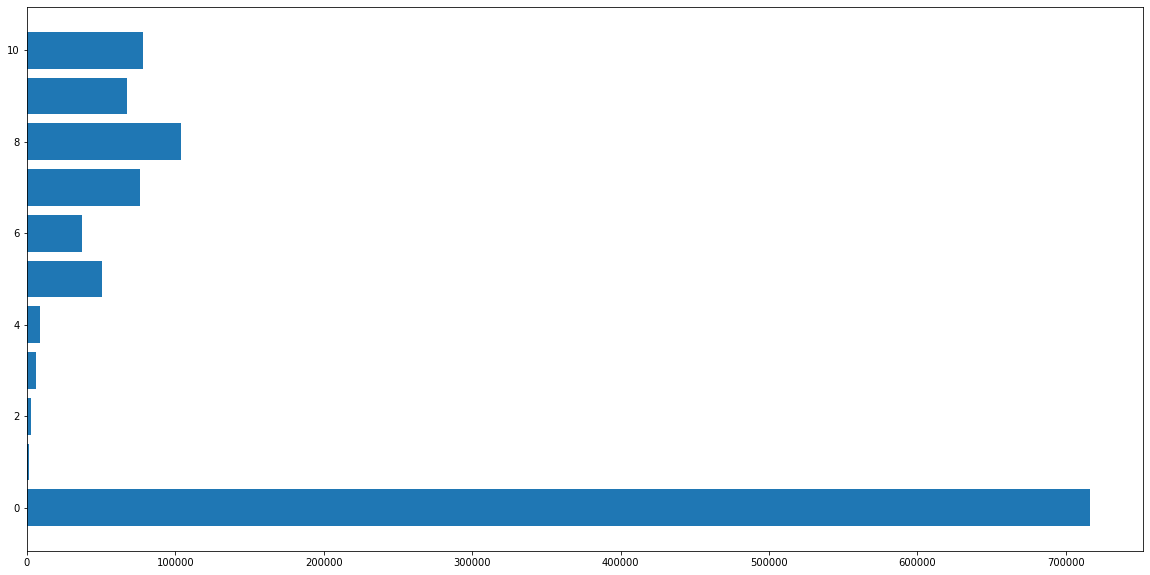

In [10]:
counts=df.bookRating.value_counts()
plt.figure(figsize=(20,10))
plt.barh(counts.index,counts.values)
plt.show()

### Distribution of Ratings per Book

In [19]:
book_ratings=df.groupby('ISBN')['bookRating'].count().clip(upper=50)

In [20]:
book_ratings.unique()

array([ 2,  1,  8,  5,  6, 14,  9,  3,  4, 13, 10, 15, 12, 19,  7, 17, 18,
       11, 24, 50, 33, 23, 26, 16, 39, 38, 30, 20, 22, 27, 46, 44, 42, 29,
       31, 21, 35, 28, 34, 37, 36, 49, 32, 41, 45, 43, 25, 48, 40, 47])

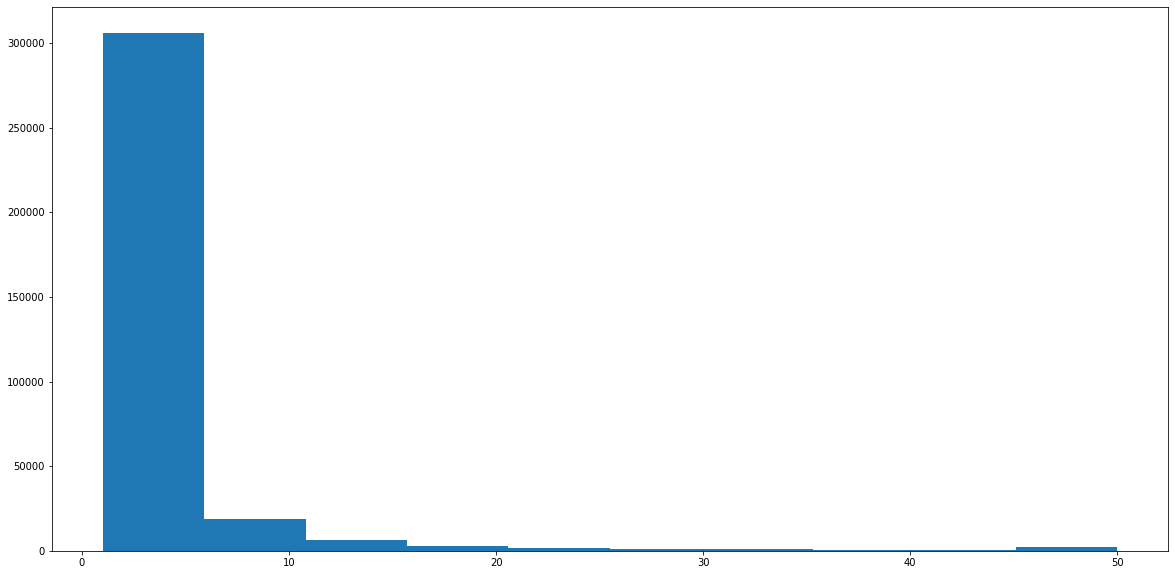

In [21]:
plt.figure(figsize=(20,10))
plt.hist(book_ratings)
plt.show()

### Distribution of Ratings per User

In [22]:
user_ratings=df.groupby('userID')['bookRating'].count().clip(upper=50)

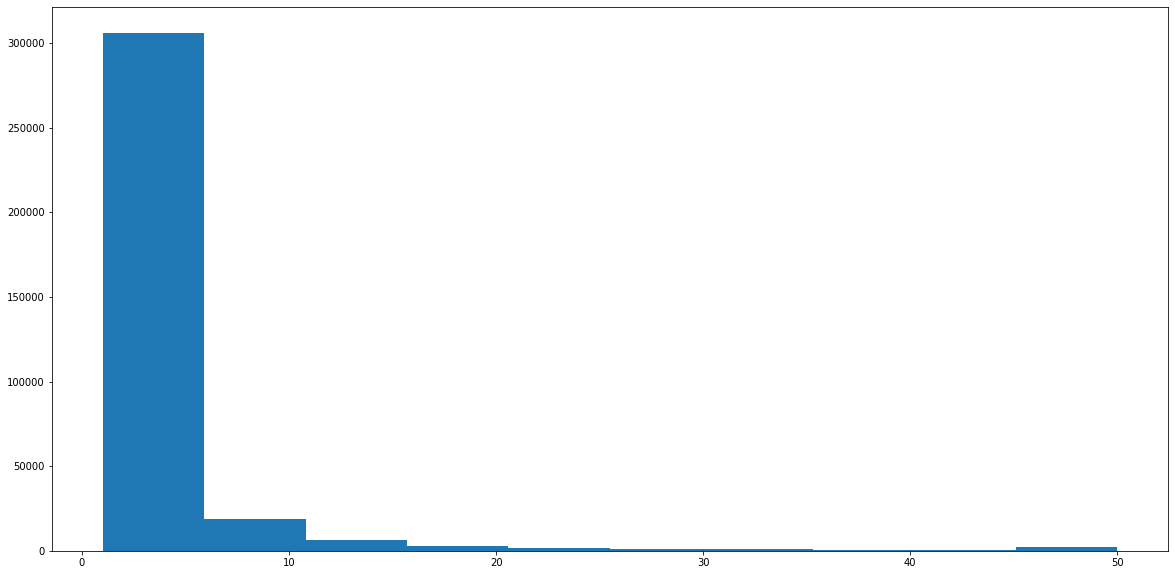

In [23]:
plt.figure(figsize=(20,10))
plt.hist(book_ratings)
plt.show()

### Set Threshold or filter values for users and ratings

#### set the threshold values to 50 for both user and ratings

In [36]:
min_book_ratings = 50
filter_books = df['ISBN'].value_counts() > min_book_ratings
filter_books = filter_books[filter_books].index.tolist()

min_user_ratings = 50
filter_users = df['userID'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = df[(df['ISBN'].isin(filter_books)) & (df['userID'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(1149780, 3)
The new data frame shape:	(140516, 3)


### Use Surprise.Dataset method to create a df to be used for recommender system by surprise library

In [29]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(df_new[['userID','ISBN','bookRating']], reader)

### Check which method in Surprise will give best output

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split('')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

In [40]:
train,test=surprise.model_selection.train_test_split(data,test_size=0.3)

In [92]:
recommender = BaselineOnly()
predictions = recommender.fit(train)
predictions=predictions.test(test)
accuracy.rmse(predictions)
recommend=recommender.predict(uid="31919",iid='1558745718')
recommend


Estimating biases using als...
RMSE: 3.3815


Prediction(uid='31919', iid='1558745718', r_ui=None, est=3.9454844372139597, details={'was_impossible': False})

In [81]:
user_prediction=recommender.predict(uid='31919',iid='105')
user_prediction.est
user_prediction

Prediction(uid='31919', iid='105', r_ui=None, est=2.3431542989599534, details={'was_impossible': False})

### Some Predictions

In [100]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(train.ur[train.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(train.ir[train.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['userID','ItemID','rui','predicted_rating','details'])
df['#Items_Rated_by_User'] = df.userID.apply(get_Iu)
df['#Ratings_by_Users'] = df.ItemID.apply(get_Ui)
df['err'] = abs(df.predicted_rating - df.rui)
best_predictions = df.loc[df['err']>0.0].sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]
user_recommendation=list(df.groupby('userID')['ItemID'])

In [122]:
df.loc[df['userID']==212467]

,userID,ItemID,rui,predicted_rating,details,#Items_Rated_by_User,#Ratings_by_Users,err
1,212467,1558745718,5.0,3.518481,{'was_impossible': False},15,37,1.481519
2676,212467,0553583441,0.0,1.692548,{'was_impossible': False},15,48,1.692548
5918,212467,0553581554,8.0,1.417721,{'was_impossible': False},15,56,6.582279
7090,212467,0060928336,0.0,2.362612,{'was_impossible': False},15,258,2.362612
10845,212467,0515119644,5.0,1.773010,{'was_impossible': False},15,32,3.226990
15201,212467,0446608602,0.0,1.377468,{'was_impossible': False},15,35,1.377468
22409,212467,1558747028,5.0,1.678224,{'was_impossible': False},15,22,3.321776
32322,212467,1558746161,10.0,3.423802,{'was_impossible': False},15,20,6.576198
33930,212467,0743411269,0.0,1.675775,{'was_impossible': False},15,21,1.675775
41989,212467,1558744606,5.0,2.031886,{'was_impossible': False},15,34,2.968114


In [112]:
df.head(10)

,userID,ItemID,rui,predicted_rating,details,#Items_Rated_by_User,#Ratings_by_Users,err
0,162639,0609804138,0.0,3.145523,{'was_impossible': False},191,90,3.145523
1,212467,1558745718,5.0,3.518481,{'was_impossible': False},15,37,1.481519
2,136205,067976397X,0.0,1.845163,{'was_impossible': False},82,40,1.845163
3,40889,0887307876,0.0,2.980114,{'was_impossible': False},137,30,2.980114
4,195469,0446310786,10.0,3.026787,{'was_impossible': False},46,157,6.973213
5,200674,0345417623,0.0,1.008695,{'was_impossible': False},123,117,1.008695
6,35859,0451205626,0.0,0.945670,{'was_impossible': False},510,24,0.945670
7,29259,067100042X,0.0,2.078327,{'was_impossible': False},98,50,2.078327
8,228681,0553578022,0.0,1.647886,{'was_impossible': False},75,45,1.647886
9,274308,0446365505,0.0,0.000000,{'was_impossible': False},152,48,0.000000
